In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

## Selecting the axis

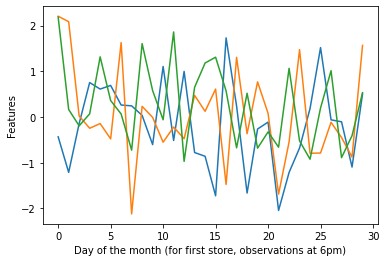

In [2]:
x = np.random.normal(size=(10, 30, 24, 3)) # Assigning meaning behind dimensions (number of stores, days, hours, revenue)

x_plot = x[0,:,5]
plt.plot(range(len(x_plot)), x_plot)
plt.xlabel('Day of the month (for first store, observations at 6pm)')
plt.ylabel('Features')
plt.show()

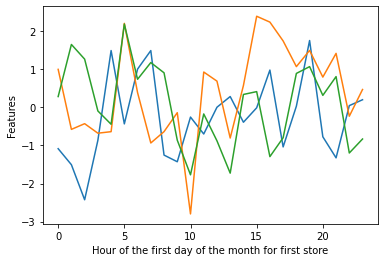

In [3]:
x_plot = x[0, 0]
plt.plot(range(len(x_plot)), x_plot)
plt.xlabel('Hour of the first day of the month for first store')
plt.ylabel('Features')
plt.show()

In [4]:
# Taking a difference on axis 2 is the same as iterating over axis 2 
# and recording the difference between consecutive elements

x_diff = np.diff(x, axis=2, prepend=0) # use prepend to add 0 to the axis=2, making the shape (10, 30, 25, 3) before diff
print('Correct result:', np.all(x[:,:,1] - x[:,:,0] == x_diff[:,:,1]))

Correct result: True


In [5]:
# Taking the outer product is the same as expanding the dimensions of vectors
# to make two matrices, and doing matrix multiplication
# Outer product: a^T @ b

a = np.random.rand(4)
b = np.random.rand(4)

print(f'a: {a.shape}, b: {b.shape}')

true_result = np.outer(a, b)
print(f'result: {true_result.shape}')

# (4, 1) x (1, 4)
a = a[:,None] # np.expand_dims(a, -1)
b = b[None,:]

print(f'a: {a.shape}, b: {b.shape}')

my_result = a * b

print(f'my result: {my_result.shape}')
print(f'all correct: {np.all(my_result == true_result)}')

a: (4,), b: (4,)
result: (4, 4)
a: (4, 1), b: (1, 4)
my result: (4, 4)
all correct: True


In [6]:
# Summing over axis=1 is the same as iterating over axis=1 and summing all the elements a[:,i,:]

a = np.random.rand(2, 3, 4)
b = a.sum(1)

c = np.zeros((2, 4))
for i in range(2):
    for j in range(4):
        c[i,j] = sum(a[i,:,j])
print('all correct:', np.all(b == c))

all correct: True


## Broadcasting
https://numpy.org/doc/stable/user/basics.broadcasting.html

In [7]:
# (some) Combinations that work:
# (64, 64, 4, 1) x (3,) -> (64, 64, 4, 3)
# (64, 64, 4, 3) x (3,) -> (64, 64, 4, 3)
# (64, 64, 1) x (3,) -> (64, 64, 3)
# (64, 1, 1) x (3, 1) -> (64, 3, 1)
# (64, 1, 44) x (3, 1) -> (64, 3, 44)
# (1, 23, 2, 1, 3) x (1, 34, 1) -> (1, 23, 2, 34, 3)

# (some) Combinations that don't work:
# (4,) x (3,) -> ???
# (4, 1) x (1, 3) -> ???
# (4, 1) x (1, 3, 1) -> ???
# (64, 64, 4) x (1, 3) -> ???

image = np.random.rand(64, 64, 4)

scale = np.random.rand(4)

result = image * scale

print(f'Input shapes: {image.shape} and {scale.shape} result in {result.shape}')

Input shapes: (64, 64, 4) and (4,) result in (64, 64, 4)


In [8]:
# Example of expanding dimensions by hand to enable broadcasting

x = np.random.rand(5, 2, 3, 4)
w = np.random.rand(64, 3)

print(x.shape)

x = x[...,None,None,:]

print('      ↓')
print(x.shape, '\n')

print(w.shape)

w = w[...,None]

print('    ↓')
print(w.shape, '\n')

y = w * x
print('Result shape:', y.shape)

(5, 2, 3, 4)
      ↓
(5, 2, 3, 1, 1, 4) 

(64, 3)
    ↓
(64, 3, 1) 

Result shape: (5, 2, 3, 64, 3, 4)
